In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import requests
import pandas as pd
import numpy as np
import sqlalchemy as sqla
import plotnine as p9
import seaborn as sns

<IPython.core.display.Javascript object>

In [12]:
# Request hesitancy data
hesitancy_endpoint = "https://data.cdc.gov/resource/q9mh-h2tw.json?$limit=4000"
r = requests.get(hesitancy_endpoint)
hesitancy_df = pd.DataFrame(r.json())
hesitancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   fips_code                      3142 non-null   object
 1   county_name                    3142 non-null   object
 2   state                          3142 non-null   object
 3   estimated_hesitant             3142 non-null   object
 4   estimated_hesitant_or_unsure   3142 non-null   object
 5   estimated_strongly_hesitant    3142 non-null   object
 6   social_vulnerability_index     3141 non-null   object
 7   svi_category                   3141 non-null   object
 8   ability_to_handle_a_covid      3142 non-null   object
 9   cvac_category                  3142 non-null   object
 10  percent_adults_fully           2864 non-null   object
 11  percent_hispanic               3142 non-null   object
 12  percent_non_hispanic_american  3142 non-null   object
 13  per

<IPython.core.display.Javascript object>

In [5]:
# Lets see the size of our dataframe
hesitancy_df.shape

(3142, 23)

<IPython.core.display.Javascript object>

In [6]:
# Extracting political party data from our public github
url = "https://raw.githubusercontent.com/gspiga/STAT141Bfinal/main/data/raw_data.csv"
poli_df = pd.read_csv(url)
poli_df.head()

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,Footnotes
0,Alabama,Republican,Republican,Republican,Republican,Appointed,NaN
1,Alaska,Republican,Republican,Republican,Appointed,Appointed,NaN
2,Arizona,Republican,Republican,Republican,Republican,Appointed,NaN
3,Arkansas,Republican,Republican,Republican,Republican,Appointed,NaN
4,California,Democrat,Democrat,Democrat,Democrat,Democrat,NaN


<IPython.core.display.Javascript object>

In [7]:
# Changing one column in poli_df to upper case so that we may join them (pandas is case sensitive).
poli_df["Location"] = poli_df["Location"].apply(
    lambda x: x.upper()  # Uppercase all state names
)
poli_df.head()

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,Footnotes
0,ALABAMA,Republican,Republican,Republican,Republican,Appointed,NaN
1,ALASKA,Republican,Republican,Republican,Appointed,Appointed,NaN
2,ARIZONA,Republican,Republican,Republican,Republican,Appointed,NaN
3,ARKANSAS,Republican,Republican,Republican,Republican,Appointed,NaN
4,CALIFORNIA,Democrat,Democrat,Democrat,Democrat,Democrat,NaN


<IPython.core.display.Javascript object>

In [8]:
# We join the dataframe
polihes_df = hesitancy_df.merge(poli_df, left_on="state", right_on="Location")

# Have to change decimal values from string to numeric
cols = [
    "estimated_hesitant",
    "estimated_hesitant_or_unsure",
    "estimated_strongly_hesitant",
    "estimated_strongly_hesitant",
    "social_vulnerability_index",
    "ability_to_handle_a_covid",
    "percent_hispanic",
    "percent_non_hispanic_asian",
    "percent_non_hispanic_black",
    "percent_non_hispanic_native",
    "percent_non_hispanic_white",
]
polihes_df[cols] = polihes_df[cols].apply(pd.to_numeric, errors="coerce", axis=1)

<IPython.core.display.Javascript object>

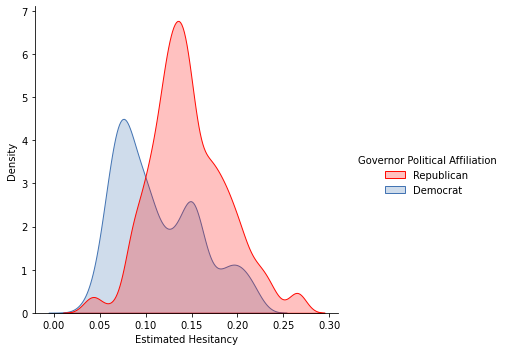

<IPython.core.display.Javascript object>

In [9]:
# Lets look at the distributions of over all hesitancy
# p9.ggplot(polihes_df, p9.aes(x = 'estimated_hesitant', y = ..density.., fill = 'Governor Political Affiliation', color = 'Governor Political Affiliation' )) + p9.geom_density(alpha = 0.3)
# Creating custom color pallete
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

poli_dens = sns.displot(
    data=polihes_df,
    x="estimated_hesitant",
    hue="Governor Political Affiliation",
    fill=True,
    kind="kde",
)
poli_dens.set(xlabel="Estimated Hesitancy")

Looking at the distributions of overall estimated hesitancy, we can see that the distribution of democratic led states has a more right skewed distribution while the distribution of Republican led states has a more roughly symmetric distribtuion. Lets observe the means of these groups. 

In [10]:
polihes_df.groupby(["Governor Political Affiliation"]).mean()

,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,ability_to_handle_a_covid,percent_hispanic,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,Footnotes
Governor Political Affiliation,,,,,,,,,,,
Democrat,0.112877,0.169319,0.072663,0.469469,0.395411,0.091480,0.018552,0.074884,0.001201,0.780671,NaN
Republican,0.146538,0.207053,0.096539,0.521559,0.573851,0.096094,0.010136,0.099417,0.000720,0.749658,NaN


<IPython.core.display.Javascript object>

In [11]:
# Lets compare the means of republican states and democratic states via a one-way anova, lets check our assumptions
# Normality

<IPython.core.display.Javascript object>